In [1]:
import matplotlib.pyplot as plt

In [2]:
node_size = 20

from matplotlib import rc
labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth - 0.2)
rc('ytick.minor', width=linewidth - 0.2)

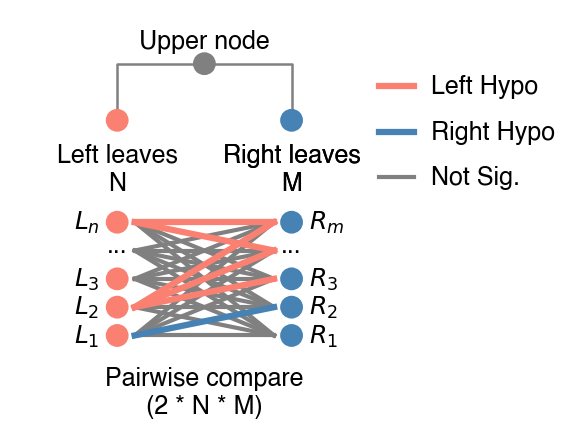

In [8]:
fig, ax = plt.subplots(figsize=(1.5, 1), dpi=300)

ax.plot((0.25, 0.25, 0.75, 0.75), (0.75, 1, 1, 0.75),
        c='gray',
        clip_on=False,
        transform=ax.transAxes)
ax.scatter(x=(0.25, 0.5, 0.75),
           y=(0.75, 1, 0.75),
           clip_on=False,
           c=['salmon', 'gray', 'steelblue'],
           zorder=10,
           transform=ax.transAxes,
           s=node_size)
ax.text(x=0.5,
        y=1.1,
        va='center',
        ha='center',
        transform=ax.transAxes,
        s='Upper node',
        fontsize=labelsize)
ax.text(x=0.25,
        y=0.65,
        va='top',
        ha='center',
        transform=ax.transAxes,
        s=f'Left leaves\nN',
        fontsize=labelsize)
ax.text(x=0.75,
        y=0.65,
        va='top',
        ha='center',
        transform=ax.transAxes,
        s=f'Right leaves\nM',
        fontsize=labelsize)

ax.text(x=0.75,
        y=0.65,
        va='top',
        ha='center',
        transform=ax.transAxes,
        s=f'Right leaves\nM',
        fontsize=labelsize)

ltexts = [r'$L_1$', r'$L_2$', r'$L_3$', '...', r'$L_n$']
rtexts = [r'$R_1$', r'$R_2$', r'$R_3$', '...', r'$R_m$']
for i, lt, rt in zip(range(5), ltexts, rtexts):
    if i == 3:
        ax.text(x=0.25,
                y=i / 8 - 0.175,
                va='center',
                ha='center',
                transform=ax.transAxes,
                s=lt,
                fontsize=labelsize)
        ax.text(x=0.75,
                y=i / 8 - 0.175,
                va='center',
                ha='center',
                transform=ax.transAxes,
                s=rt,
                fontsize=labelsize)
        continue
    ax.scatter(x=(0.25, 0.75),
               y=(i / 8 - 0.2, i / 8 - 0.2),
               clip_on=False,
               c=['salmon', 'steelblue'],
               zorder=10,
               transform=ax.transAxes,
               s=node_size)
    ax.text(x=0.2,
            y=i / 8 - 0.2,
            va='center',
            ha='right',
            transform=ax.transAxes,
            s=lt,
            fontsize=labelsize)
    ax.text(x=0.8,
            y=i / 8 - 0.2,
            va='center',
            ha='left',
            transform=ax.transAxes,
            s=rt,
            fontsize=labelsize)
    
blues = [(0, 1)]
reds = [(1, 2), (1, 3), (1, 4), (4, 3), (4, 4)]
for i in range(5):
    for j in range(5):
        if (i, j) in blues:
            color='steelblue'
        elif (i, j) in reds:
            color='salmon'
        else:
            color='gray'
        ax.plot((0.3, 0.7), (i / 8 - 0.2, j / 8 - 0.2),
                c=color,
                zorder=5 if color=='gray' else 10,
                linewidth=1 if color=='gray' else 1.5,
                transform=ax.transAxes,
                clip_on=False)

ax.text(x=0.5,
        y=-0.45,
        va='center',
        ha='center',
        transform=ax.transAxes,
        s='Pairwise compare\n(2 * N * M)',
        fontsize=labelsize)

ax.plot((1., 1.1), (0.9, 0.9),
        linewidth=1.5,
        clip_on=False, c='salmon',
        transform=ax.transAxes,)
ax.plot((1., 1.1), (0.7, 0.7),
        linewidth=1.5,
        clip_on=False, c='steelblue',
        transform=ax.transAxes,)
ax.plot((1., 1.1), (0.5, 0.5),
        linewidth=1,
        clip_on=False, c='gray',
        transform=ax.transAxes,)

ax.text(1.15, 0.9, 'Left Hypo',
        va='center',
        fontsize=labelsize,
        transform=ax.transAxes,)
ax.text(1.15, 0.7, 'Right Hypo',
        va='center',
        fontsize=labelsize,
        transform=ax.transAxes,)
ax.text(1.15, 0.5, 'Not Sig.',
        va='center',
        fontsize=labelsize,
        transform=ax.transAxes,)
ax.axis('off')
fig.savefig('legend.pdf', bbox_inches='tight')

In [4]:
import seaborn as sns
from matplotlib.colors import ListedColormap, Normalize
import matplotlib.ticker as ticker
from matplotlib.colorbar import ColorbarBase


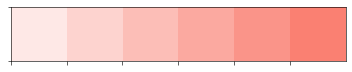

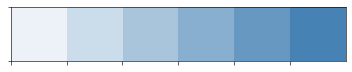

In [5]:
sns.palplot(sns.light_palette("salmon"))
sns.palplot(sns.light_palette("steelblue"))

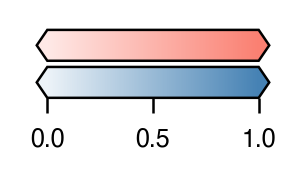

In [7]:
hue_norm = (0, 1)

fig, (cax_left, cax_right) = plt.subplots(figsize=(1, 0.3), 
                                          nrows=2, dpi=300)
orientation = 'horizontal'
left_cmap = sns.light_palette("salmon", as_cmap=True)
right_cmap = sns.light_palette("steelblue", as_cmap=True)
cnorm = Normalize(vmin=hue_norm[0],
                      vmax=hue_norm[1])

colorbar = ColorbarBase(cax_left,
                        cmap=left_cmap,
                        norm=cnorm,
                        orientation=orientation,
                        extend='both')
colorbar.outline.set_linewidth(linewidth)
colorbar.set_ticks([])

colorbar = ColorbarBase(cax_right,
                        cmap=right_cmap,
                        norm=cnorm,
                        orientation=orientation,
                        extend='both')
#colorbar.locator = ticker.MaxNLocator(nbins=5)
#colorbar.update_ticks()

colorbar.outline.set_linewidth(linewidth)
#colorbar.ax.tick_params(size=labelsize,
#                        labelsize=labelsize,
#                        width=linewidth)
fig.savefig('color_bar.pdf')